### set up the Python environment

In [1]:
# Data Manipulation & Analysis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import missingno as msno

# data Visualization
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import missingno as msno
import cufflinks as cf
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# Machine learning Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# sklearn Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# sklearn metrics

from sklearn.metrics import classification_report, confusion_matrix,roc_curve,accuracy_score, matthews_corrcoef,auc, roc_auc_score,f1_score, log_loss,precision_recall_curve
from sklearn.metrics import roc_curve

#sklearn Base
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split


#sklearn Processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder,StandardScaler

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#sklearn Compose
from sklearn.compose import ColumnTransformer

import pickle

cf.set_config_file(world_readable=True,offline=False)
pd.set_option('display.max_columns', None)

### Data import and cleaning

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


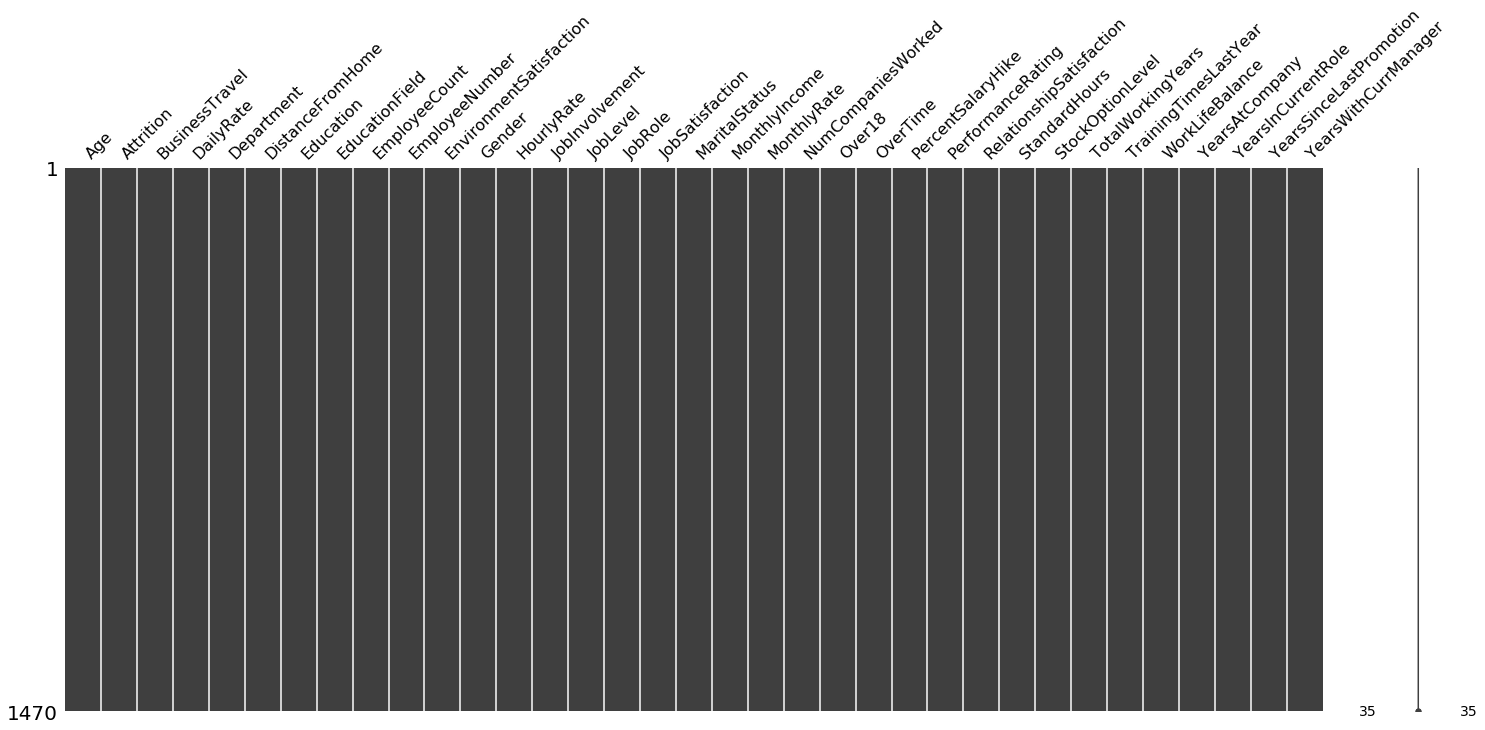

In [5]:
msno.matrix(df)

We have no missing values

In [6]:
lis = []
for col in df.columns:
    lis.append([col, df[col].dtype, sum(df[col].isnull()), 100*(sum(df[col].isnull())/len(df[col])), 
                df[col].nunique()])
pd.DataFrame(lis, columns=['Name', 'Type', 'jml Null', '% Null', 'Unique'])

,Name,Type,jml Null,% Null,Unique
0,Age,int64,0,0.0,43
1,Attrition,object,0,0.0,2
2,BusinessTravel,object,0,0.0,3
3,DailyRate,int64,0,0.0,886
4,Department,object,0,0.0,3
5,DistanceFromHome,int64,0,0.0,29
6,Education,int64,0,0.0,5
7,EducationField,object,0,0.0,6
8,EmployeeCount,int64,0,0.0,1
9,EmployeeNumber,int64,0,0.0,1470


In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Data Description and Exploratory Visualisations

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [10]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [11]:
attrition = df[(df['Attrition'] != 0)]
no_attrition = df[(df['Attrition'] == 0)]


trace = go.Pie(labels = ['No_attrition', 'Yes_attrition'], values = df['Attrition'].value_counts(), 
               textfont=dict(size=15), opacity = 0.8,
               marker=dict(colors=['gold','sky blue'], 
                           line=dict(color='#000000', width=1.5)))


layout = dict(title =  'Distribution of Attrition')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

Imbalaced target features

#### Features Correlation Observation

In [12]:
corr=df.corr()
corr=(corr)
corr

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


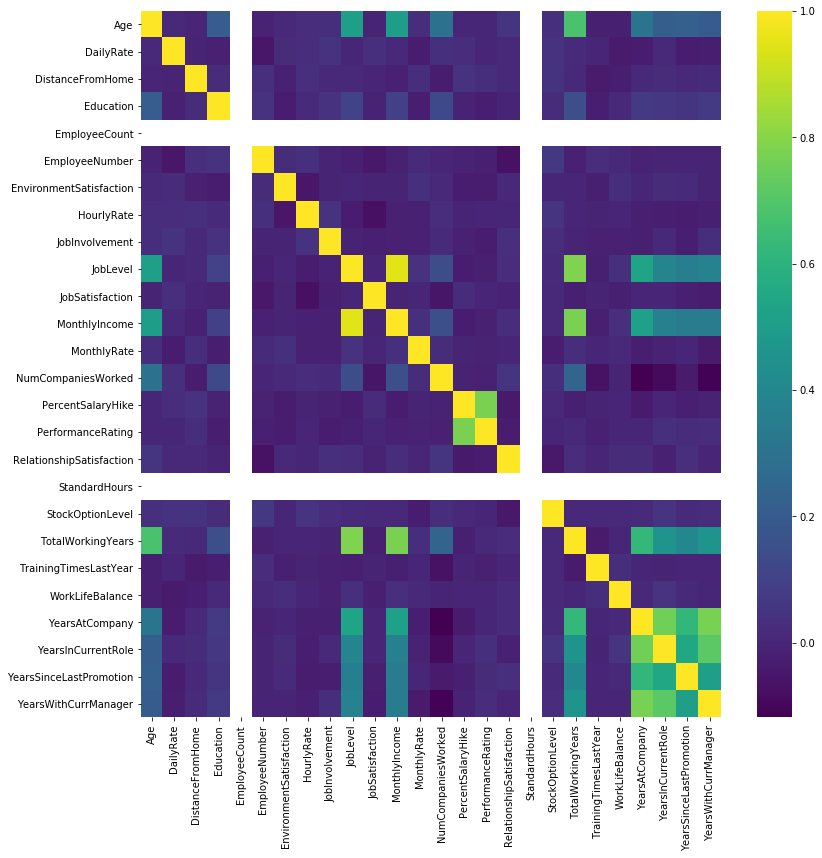

In [13]:
plt.figure(figsize=(13, 13))
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap='viridis')

we can now see which variables are poorly correlated and which ones are strongly correlated. (Years-Years), (Performance-Performance)

#### Observation on Numerical Features

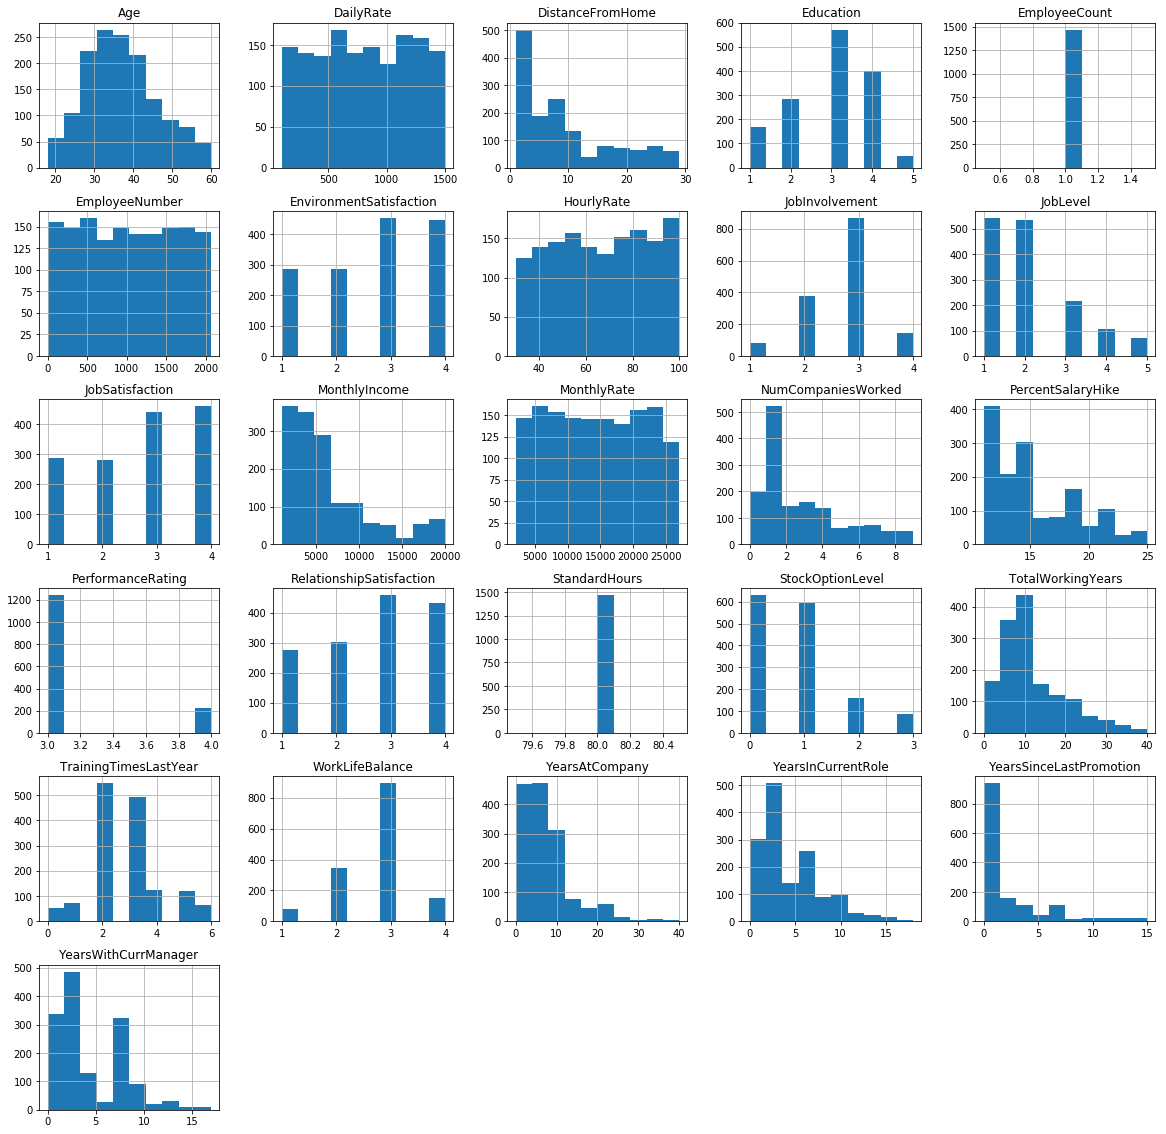

In [14]:
df.hist(figsize=(20,20))
plt.show()

A few observations can be made based on the information and histograms for numerical features:

+ several distributions are right-skewed (i.e. MonthlyIncome DistanceFromHome, YearsAtCompany). Data transformation methods may be required to approach a normal distribution prior to fitting a model to the data.
+ Age distribution is a slightly right-skewed normal distribution with the bulk of the staff between 25 and 45 years old.
+ EmployeeCount and StandardHours are constant values for all employees and most likely will be dropped.
+ Employee Number is likely the primary key

### Feature Distribution

#### Age

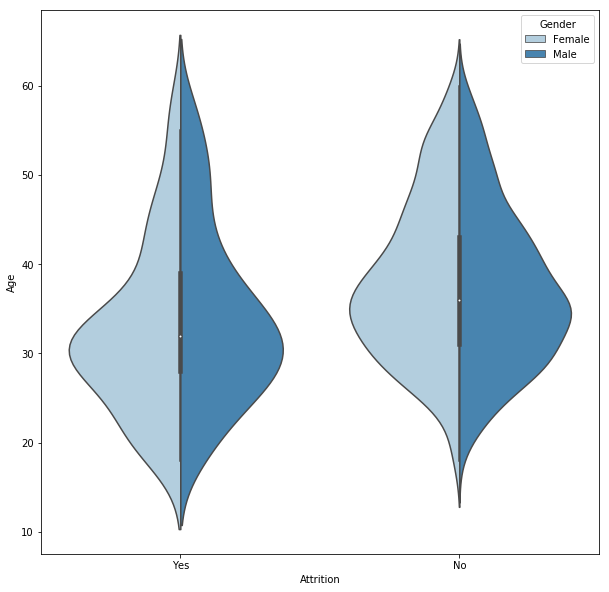

In [15]:
plt.figure(figsize=(10, 10))
sns.violinplot(df['Attrition'],df['Age'],hue=df['Gender'], split=True, palette = "Blues")

Mostly the employees are between 20-40 years old

#### Education

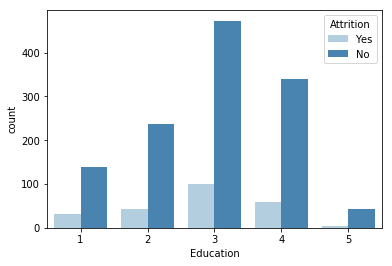

In [16]:
sns.countplot(df['Education'], hue = df['Attrition'], palette = "Blues")

In [17]:
listItem = []
for col in df['Education'].unique():
    listItem.append([col, 
                    (df[(df['Attrition']=='Yes')&(df['Education']==col)]['Attrition'].count() / df[df['Education']==col]['Attrition'].count() * 100),
                    (df[(df['Attrition']=='No')&(df['Education']==col)]['Attrition'].count() / df[df['Education']==col]['Attrition'].count() * 100)
                    ])
    
dfPaid = pd.DataFrame(listItem, columns='Education,Quit,Stay'.split(','))
dfPaid

,Education,Quit,Stay
0,2,15.602837,84.397163
1,1,18.235294,81.764706
2,4,14.572864,85.427136
3,3,17.307692,82.692308
4,5,10.416667,89.583333


#### Gender

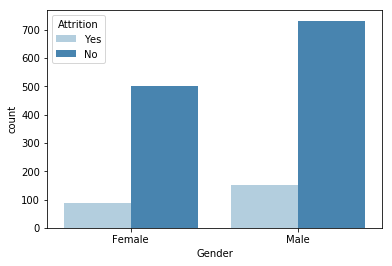

In [18]:
sns.countplot(df['Gender'], hue = df['Attrition'], palette = "Blues")

In [19]:
listItem = []
for col in df['Gender'].unique():
    listItem.append([col, 
                    (df[(df['Attrition']=='Yes')&(df['Gender']==col)]['Attrition'].count() / df[df['Gender']==col]['Attrition'].count() * 100),
                    (df[(df['Attrition']=='No')&(df['Gender']==col)]['Attrition'].count() / df[df['Gender']==col]['Attrition'].count() * 100)
                    ])
    
dfPaid = pd.DataFrame(listItem, columns='Education,Quit,Stay'.split(','))
dfPaid

,Education,Quit,Stay
0,Female,14.795918,85.204082
1,Male,17.006803,82.993197


#### Marital status

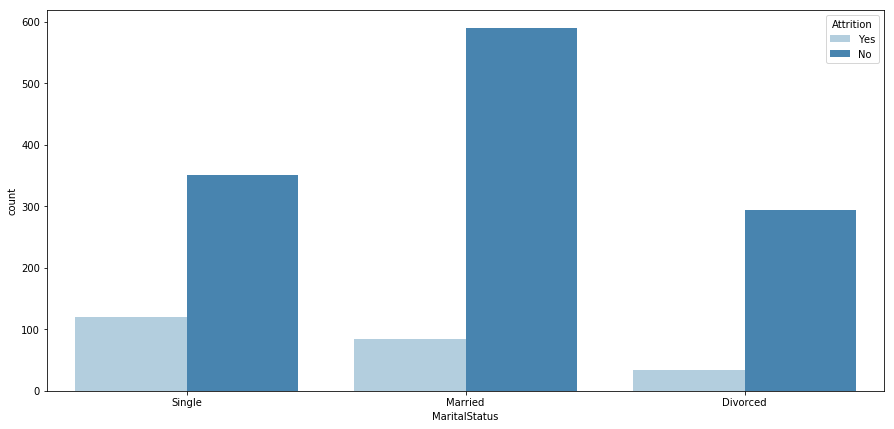

In [20]:
fig = plt.figure(figsize=(15, 7))
sns.countplot(df['MaritalStatus'], hue = df['Attrition'], palette = "Blues")

In [21]:
listItem = []
for col in df['MaritalStatus'].unique():
    listItem.append([col, 
                    (df[(df['Attrition']=='Yes')&(df['MaritalStatus']==col)]['Attrition'].count() / df[df['MaritalStatus']==col]['Attrition'].count() * 100),
                    (df[(df['Attrition']=='No')&(df['MaritalStatus']==col)]['Attrition'].count() / df[df['MaritalStatus']==col]['Attrition'].count() * 100)
                    ])
    
dfPaid = pd.DataFrame(listItem, columns='Marital,Quit,Stay'.split(','))
dfPaid

,Marital,Quit,Stay
0,Single,25.531915,74.468085
1,Married,12.481426,87.518574
2,Divorced,10.091743,89.908257


#### Distance From Home

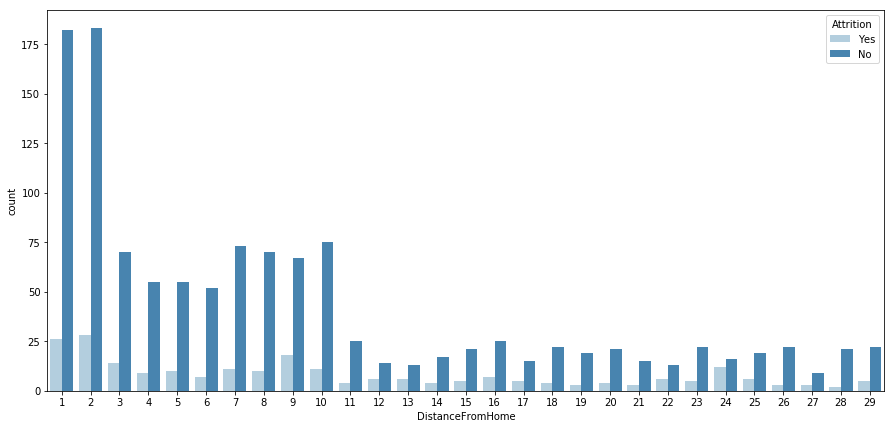

In [22]:
fig = plt.figure(figsize=(15, 7))
sns.countplot(df['DistanceFromHome'] , hue = df['Attrition'],palette = "Blues")

In [23]:
listItem = []
for col in df['DistanceFromHome'].unique():
    listItem.append([col, 
                    (df[(df['Attrition']=='Yes')&(df['DistanceFromHome']==col)]['Attrition'].count() / df[df['DistanceFromHome']==col]['Attrition'].count() * 100),
                    (df[(df['Attrition']=='No')&(df['DistanceFromHome']==col)]['Attrition'].count() / df[df['DistanceFromHome']==col]['Attrition'].count() * 100)
                    ])
    
dfPaid = pd.DataFrame(listItem, columns='Distance,Quit,Stay'.split(','))
dfPaid.sort_values(ascending = False, by = 'Quit')

,Distance,Quit,Stay
4,24,42.857143,57.142857
28,13,31.578947,68.421053
23,22,31.578947,68.421053
20,12,30.000000,70.000000
27,17,25.000000,75.000000
6,27,25.000000,75.000000
19,25,24.000000,76.000000
7,16,21.875000,78.125000
14,9,21.176471,78.823529
8,15,19.230769,80.769231


#### Department

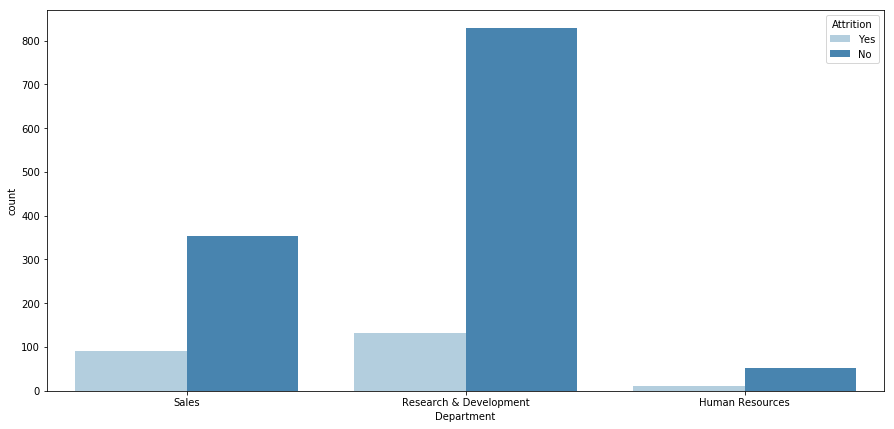

In [24]:
fig = plt.figure(figsize=(15, 7))
sns.countplot(df['Department'], hue = df['Attrition'],palette = "Blues")

In [25]:
listItem = []
for col in df['Department'].unique():
    listItem.append([col, 
                    (df[(df['Attrition']=='Yes')&(df['Department']==col)]['Attrition'].count() / df[df['Department']==col]['Attrition'].count() * 100),
                    (df[(df['Attrition']=='No')&(df['Department']==col)]['Attrition'].count() / df[df['Department']==col]['Attrition'].count() * 100)
                    ])
    
dfPaid = pd.DataFrame(listItem, columns='Department,Quit,Stay'.split(','))
dfPaid.sort_values(ascending = False, by = 'Quit')

,Department,Quit,Stay
0,Sales,20.627803,79.372197
2,Human Resources,19.047619,80.952381
1,Research & Development,13.839750,86.160250


#### Role and Work Conditions

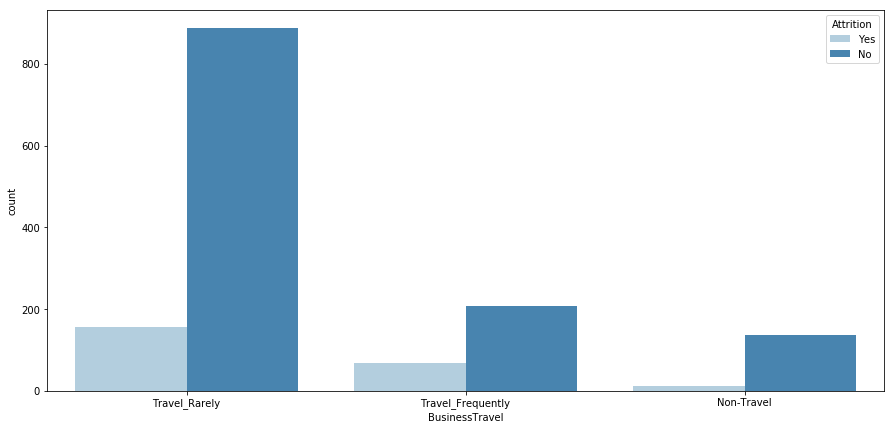

In [26]:
fig = plt.figure(figsize=(15, 7))
sns.countplot(df['BusinessTravel'], hue = df['Attrition'],palette = "Blues")

In [27]:
listItem = []
for col in df['BusinessTravel'].unique():
    listItem.append([col, 
                    (df[(df['Attrition']=='Yes')&(df['BusinessTravel']==col)]['Attrition'].count() / df[df['BusinessTravel']==col]['Attrition'].count() * 100),
                    (df[(df['Attrition']=='No')&(df['BusinessTravel']==col)]['Attrition'].count() / df[df['BusinessTravel']==col]['Attrition'].count() * 100)
                    ])
    
dfPaid = pd.DataFrame(listItem, columns='Business Travel,Quit,Stay'.split(','))
dfPaid.sort_values(ascending = False, by = 'Quit')

,Business Travel,Quit,Stay
1,Travel_Frequently,24.909747,75.090253
0,Travel_Rarely,14.956855,85.043145
2,Non-Travel,8.000000,92.000000


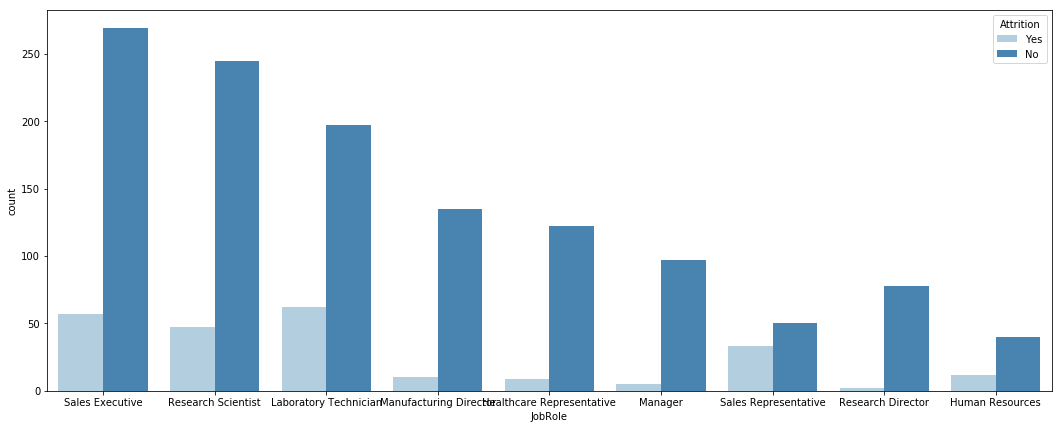

In [28]:
fig = plt.figure(figsize=(18, 7))
sns.countplot(df['JobRole'], hue = df['Attrition'],palette = "Blues")

In [29]:
listItem = []
for col in df['JobRole'].unique():
    listItem.append([col, 
                    (df[(df['Attrition']=='Yes')&(df['JobRole']==col)]['Attrition'].count() / df[df['JobRole']==col]['Attrition'].count() * 100),
                    (df[(df['Attrition']=='No')&(df['JobRole']==col)]['Attrition'].count() / df[df['JobRole']==col]['Attrition'].count() * 100)
                    ])
    
dfPaid = pd.DataFrame(listItem, columns='Role at Company,Quit,Stay'.split(','))
dfPaid.sort_values(ascending = False, by = 'Quit')

,Role at Company,Quit,Stay
6,Sales Representative,39.759036,60.240964
2,Laboratory Technician,23.938224,76.061776
8,Human Resources,23.076923,76.923077
0,Sales Executive,17.484663,82.515337
1,Research Scientist,16.095890,83.904110
3,Manufacturing Director,6.896552,93.103448
4,Healthcare Representative,6.870229,93.129771
5,Manager,4.901961,95.098039
7,Research Director,2.500000,97.500000


#### Job Level

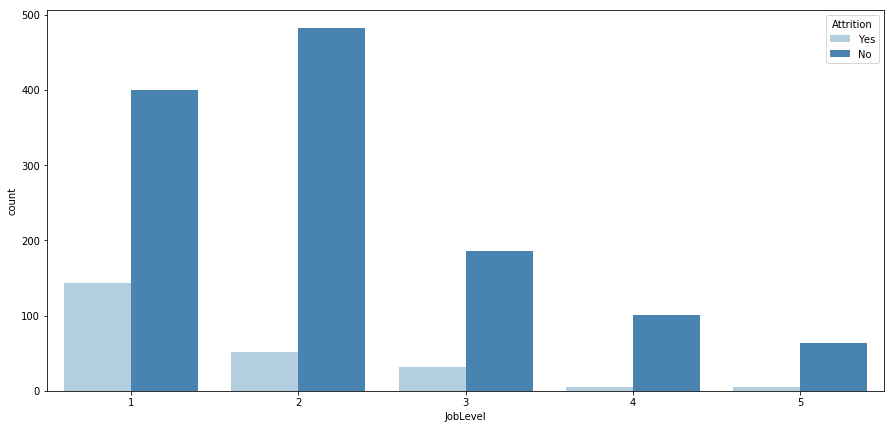

In [30]:
fig = plt.figure(figsize=(15, 7))
sns.countplot(df['JobLevel'], hue = df['Attrition'],palette = "Blues")

In [31]:
listItem = []
for col in df['JobLevel'].unique():
    listItem.append([col, 
                    (df[(df['Attrition']=='Yes')&(df['JobLevel']==col)]['Attrition'].count() / df[df['JobLevel']==col]['Attrition'].count() * 100),
                    (df[(df['Attrition']=='No')&(df['JobLevel']==col)]['Attrition'].count() / df[df['JobLevel']==col]['Attrition'].count() * 100)
                    ])
    
dfPaid = pd.DataFrame(listItem, columns='Role at Company,Quit,Stay'.split(','))
dfPaid.sort_values(ascending = False, by = 'Quit')

,Role at Company,Quit,Stay
1,1,26.335175,73.664825
2,3,14.678899,85.321101
0,2,9.737828,90.262172
4,5,7.246377,92.753623
3,4,4.716981,95.283019


#### Years At Company

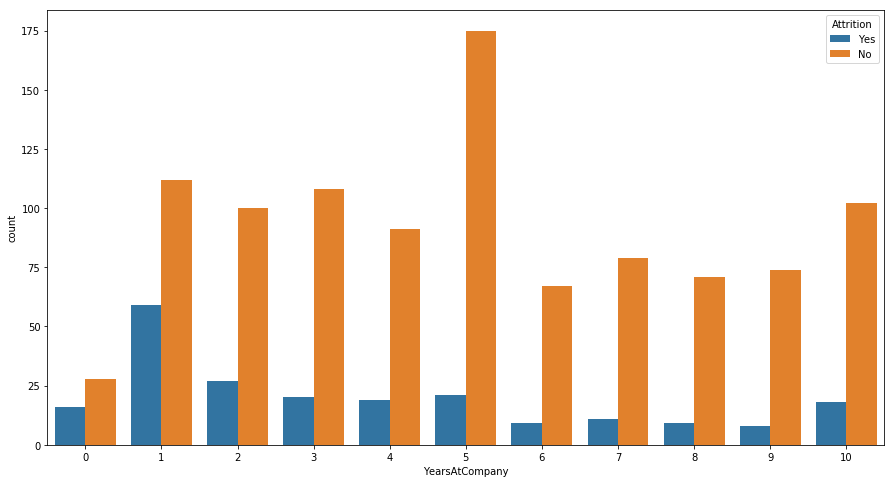

In [32]:
fig=plt.figure(figsize=(15,8))
value=df['YearsAtCompany']<11
df3=df[value]
sns.countplot(x='YearsAtCompany',hue='Attrition',data=df3)
plt.show()

In [33]:
listItem = []
for col in df['YearsAtCompany'].unique():
    listItem.append([col, 
                    (df[(df['Attrition']=='Yes')&(df['YearsAtCompany']==col)]['Attrition'].count() / df[df['YearsAtCompany']==col]['Attrition'].count() * 100),
                    (df[(df['Attrition']=='No')&(df['YearsAtCompany']==col)]['Attrition'].count() / df[df['YearsAtCompany']==col]['Attrition'].count() * 100),
                     len(df[df['YearsAtCompany']== col])])
    
dfPaid = pd.DataFrame(listItem, columns='Year at Company,Quit,Stay, sum'.split(','))
dfPaid.sort_values(ascending = False, by = 'Quit')

,Year at Company,Quit,Stay,sum
24,40,100.000000,0.000000,1
36,23,50.000000,50.000000,2
2,0,36.363636,63.636364,44
6,1,34.502924,65.497076,171
32,32,33.333333,66.666667,3
31,31,33.333333,66.666667,3
4,2,21.259843,78.740157,127
26,33,20.000000,80.000000,5
9,4,17.272727,82.727273,110
25,24,16.666667,83.333333,6


#### Years at the Company


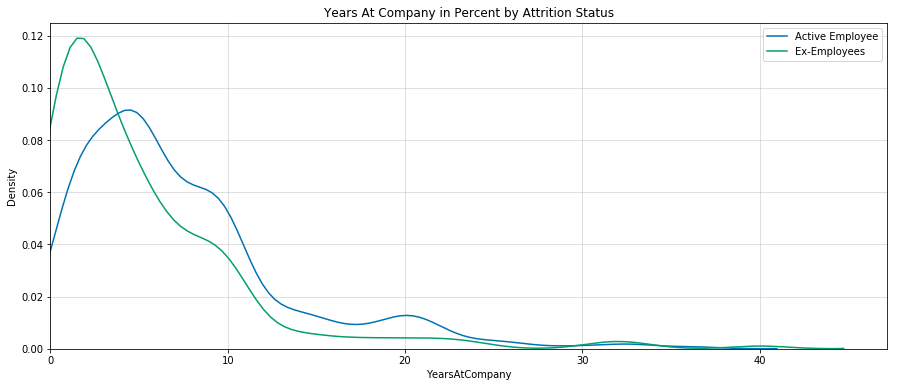

In [34]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'YearsAtCompany'], label = 'Active Employee')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'YearsAtCompany'], label = 'Ex-Employees')
plt.xlabel('YearsAtCompany')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years At Company in Percent by Attrition Status');

#### Years of current Role

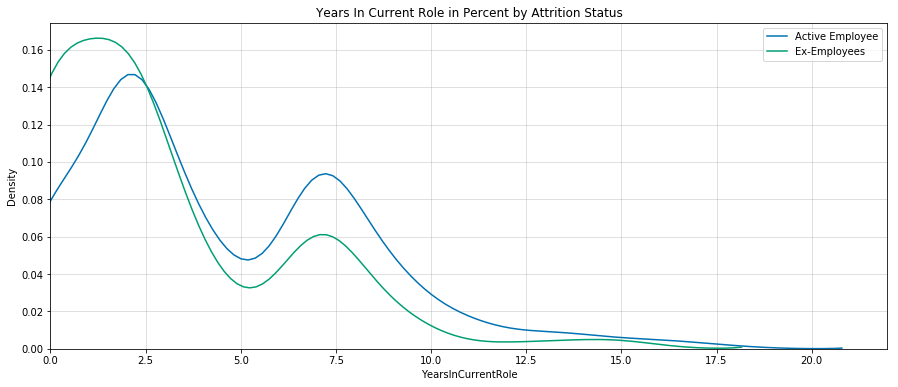

In [35]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'YearsInCurrentRole'], label = 'Active Employee')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'YearsInCurrentRole'], label = 'Ex-Employees')
plt.xlabel('YearsInCurrentRole')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years In Current Role in Percent by Attrition Status');

In [36]:
listItem = []
for col in df['YearsInCurrentRole'].unique():
    listItem.append([col, 
                    (df[(df['Attrition']=='Yes')&(df['YearsInCurrentRole']==col)]['Attrition'].count() / df[df['YearsInCurrentRole']==col]['Attrition'].count() * 100),
                    (df[(df['Attrition']=='No')&(df['YearsInCurrentRole']==col)]['Attrition'].count() / df[df['YearsInCurrentRole']==col]['Attrition'].count() * 100),
                     len(df[df['YearsInCurrentRole']== col])])
    
dfPaid = pd.DataFrame(listItem, columns='Year at Current Role,Quit,Stay, sum'.split(','))
dfPaid.sort_values(ascending = False, by = 'Quit')

,Year at Current Role,Quit,Stay,sum
2,0,29.918033,70.081967,244
11,15,25.000000,75.000000,8
10,1,19.298246,80.701754,57
3,2,18.279570,81.720430,372
0,4,14.423077,85.576923,104
1,7,13.963964,86.036036,222
7,3,11.851852,88.148148,135
16,12,10.000000,90.000000,10
12,14,9.090909,90.909091,11
5,9,8.955224,91.044776,67


#### Total working year

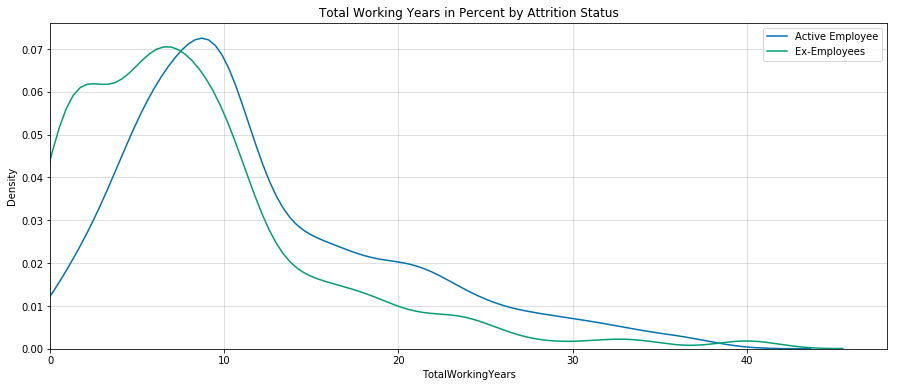

In [37]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'TotalWorkingYears'], label = 'Active Employee')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'TotalWorkingYears'], label = 'Ex-Employees')
plt.xlabel('TotalWorkingYears')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Total Working Years in Percent by Attrition Status');

In [38]:
listItem = []
for col in df['TotalWorkingYears'].unique():
    listItem.append([col, 
                    (df[(df['Attrition']=='Yes')&(df['TotalWorkingYears']==col)]['Attrition'].count() / df[df['TotalWorkingYears']==col]['Attrition'].count() * 100),
                    (df[(df['Attrition']=='No')&(df['TotalWorkingYears']==col)]['Attrition'].count() / df[df['TotalWorkingYears']==col]['Attrition'].count() * 100),
                     len(df[df['TotalWorkingYears']== col])])
    
dfPaid = pd.DataFrame(listItem, columns='Total working year,Quit,Stay, sum'.split(','))
dfPaid.sort_values(ascending = False, by = 'Quit')

,Total working year,Quit,Stay,sum
32,40,100.000000,0.000000,2
5,1,49.382716,50.617284,81
11,0,45.454545,54.545455,11
17,2,29.032258,70.967742,31
2,7,22.222222,77.777778,81
8,3,21.428571,78.571429,42
35,34,20.000000,80.000000,5
27,11,19.444444,80.555556,36
21,4,19.047619,80.952381,63
7,5,18.181818,81.818182,88


#### Working With Current manager

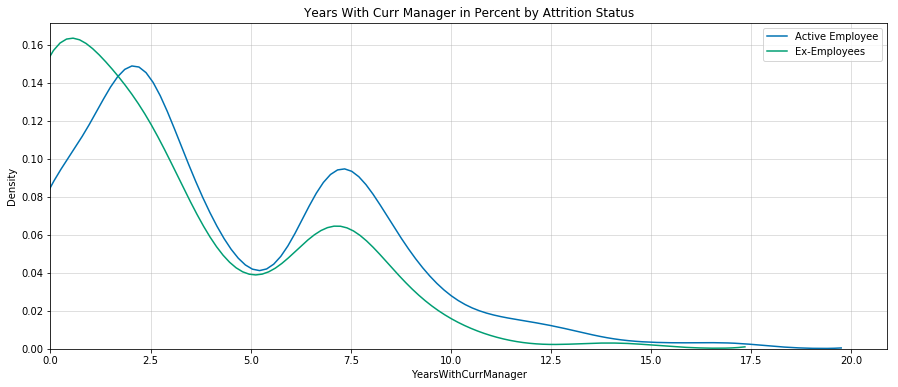

In [39]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'YearsWithCurrManager'], label = 'Active Employee')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'YearsWithCurrManager'], label = 'Ex-Employees')
plt.xlabel('YearsWithCurrManager')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years With Curr Manager in Percent by Attrition Status');

In [40]:
listItem = []
for col in df['YearsWithCurrManager'].unique():
    listItem.append([col, 
                    (df[(df['Attrition']=='Yes')&(df['YearsWithCurrManager']==col)]['Attrition'].count() / df[df['YearsWithCurrManager']==col]['Attrition'].count() * 100),
                    (df[(df['Attrition']=='No')&(df['YearsWithCurrManager']==col)]['Attrition'].count() / df[df['YearsWithCurrManager']==col]['Attrition'].count() * 100),
                     len(df[df['YearsWithCurrManager']== col])])
    
dfPaid = pd.DataFrame(listItem, columns='Year With Current Manager,Quit,Stay, sum'.split(','))
dfPaid.sort_values(ascending = False, by = 'Quit')

,Year With Current Manager,Quit,Stay,sum
17,14,40.000000,60.000000,5
2,0,32.319392,67.680608,263
3,2,14.534884,85.465116,344
9,1,14.473684,85.526316,76
1,7,14.351852,85.648148,216
4,6,13.793103,86.206897,29
6,3,13.380282,86.619718,142
0,5,12.903226,87.096774,31
10,4,11.224490,88.775510,98
13,10,11.111111,88.888889,27


#### Pay/Salary Employee Information

In [41]:
print("Employee Hourly Rate varies from ${} to ${}.".format(
    df['HourlyRate'].min(), df['HourlyRate'].max()))

Employee Hourly Rate varies from $30 to $100.


In [42]:
print("Employee Daily Rate varies from ${} to ${}.".format(
    df['DailyRate'].min(), df['DailyRate'].max()))

Employee Daily Rate varies from $102 to $1499.


In [43]:
print("Employee Monthly Rate varies from ${} to ${}.".format(
    df['MonthlyRate'].min(), df['MonthlyRate'].max()))

Employee Monthly Rate varies from $2094 to $26999.


In [44]:
print("Employee Monthly Income varies from ${} to ${}.".format(
    df['MonthlyIncome'].min(), df['MonthlyIncome'].max()))

Employee Monthly Income varies from $1009 to $19999.


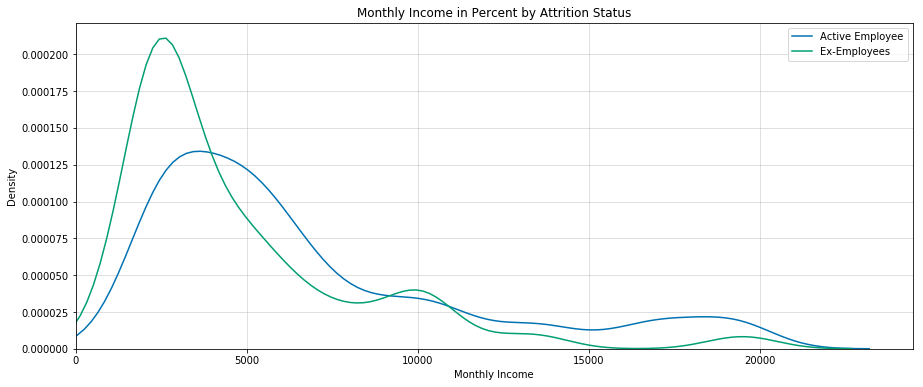

In [45]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df.loc[df['Attrition'] == 'No', 'MonthlyIncome'], label = 'Active Employee')
sns.kdeplot(df.loc[df['Attrition'] == 'Yes', 'MonthlyIncome'], label = 'Ex-Employees')
plt.xlabel('Monthly Income')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Monthly Income in Percent by Attrition Status');

### Features Engineering

In [46]:
# df['DistanceFromHome_rootedTo_JobSatisfaction'] = df['DistanceFromHome']**(1/df['JobSatisfaction'])
# df['TotalJobSatisfaction'] = df['EnvironmentSatisfaction'] + df['JobSatisfaction'] + df['RelationshipSatisfaction'] 
# df['OldLowEmployeeTendToStay'] = df['YearsAtCompany'] / df['JobLevel']
# df['is_Mothers'] = np.where((df['Gender']=='Female') & (df['Age']>=36), 1,0)
# df['Rate'] = df['DailyRate'] * 20 + df['HourlyRate'] * 8 * 20 + df['MonthlyRate']
# df['RateExtended'] = df['Rate'] * (8 - df['JobSatisfaction'] - df['EnvironmentSatisfaction'])

In [47]:
# df['StandardWeeklyHours'] = df.StandardHours / 2  # Add Weekly hours along with biweekly hours
# df['Salary'] = df.DailyRate * 5 * 52  # Their Yearly Salary (Assumes 5 days a week)
# df['AgeBin'] = pd.cut(df.Age, [x for x in range(17, 70, 2)])
# df['DailyRateQBin'] = pd.qcut(df.DailyRate, [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])
# df['SalaryQBin'] = pd.qcut(df.Salary, [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])
# df['DistanceFromHomeBin'] = pd.cut(df.DistanceFromHome, [x for x in range(0, 33, 3)])
# df['YearsAtCompanyBin'] = pd.cut(df.YearsAtCompany, [x for x in range(0, 44, 2)], right=False) # used left include to include 0
# df['PercentSalaryHikeQBin'] = pd.qcut(df.PercentSalaryHike, [0, .2, .4, .6, .8, 1])
# df['TotalWorkingYearsBin'] = pd.cut(df.TotalWorkingYears, [x for x in range(0, 44, 2)], right=False) # used left include to include 0

### Data Preparation

In [48]:
le = LabelEncoder()
le_count = 0
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

4 columns were label encoded.


In [49]:
df = pd.get_dummies(df, drop_first=True)

In [50]:
# cat_df=df.select_dtypes(include='object')
# cat_df.columns

In [51]:
# for col in cat_df:
#     transform(col)

In [52]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [53]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRo

In [54]:
df.shape

(1470, 49)

Feature Scaling using MinMaxScaler essentially shrinks the range such that the range is now between 0 and n. Machine Learning algorithms perform better when input numerical variables fall within a similar scale. In this case, we are scaling between 0 and 5.

In [55]:
scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(df.columns)
HR_col.remove('Attrition')
for col in HR_col:
    df[col] = df[col].astype(float)
    df[[col]] = scaler.fit_transform(df[[col]])
df['Attrition'] = pd.to_numeric(df['Attrition'], downcast='float')
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2.738095,1.0,3.579098,0.000000,1.25,0.0,0.000000,1.666667,0.0,4.571429,3.333333,1.25,5.000000,1.312270,3.490263,4.444444,0.0,5.0,0.000000,0.0,0.000000,0.0,0.000000,1.000,0.0,0.000000,0.75,1.111111,0.000000,1.470588,0.0,5.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1,3.690476,0.0,0.633500,1.250000,0.00,0.0,0.002419,3.333333,5.0,2.214286,1.666667,1.25,1.666667,1.085045,4.580004,0.555556,0.0,0.0,4.285714,5.0,5.000000,0.0,1.666667,1.250,2.5,3.333333,1.25,1.944444,0.333333,2.058824,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,2.261905,1.0,4.549034,0.178571,1.25,0.0,0.007257,5.000000,5.0,4.428571,1.666667,0.00,3.333333,0.284623,0.060630,3.333333,0.0,5.0,1.428571,0.0,1.666667,0.0,0.000000,0.875,2.5,3.333333,0.00,0.000000,0.000000,0.000000,0.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.785714,0.0,4.617037,0.357143,3.75,0.0,0.009676,5.000000,0.0,1.857143,3.333333,0.00,3.333333,0.500263,4.229070,0.555556,0.0,5.0,0.000000,0.0,3.333333,0.0,0.000000,1.000,2.5,3.333333,1.00,1.944444,1.000000,0.000000,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
4,1.071429,0.0,1.750179,0.178571,0.00,0.0,0.014514,0.000000,5.0,0.714286,3.333333,0.00,1.666667,0.647446,2.918691,5.000000,0.0,0.0,0.357143,0.0,5.000000,0.0,1.666667,0.750,2.5,3.333333,0.25,0.555556,0.666667,0.588235,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [56]:
print('Size of Full Encoded Dataset: {}'. format(df.shape))

Size of Full Encoded Dataset: (1470, 49)


In [57]:
y = df['Attrition']

In [58]:
X = df.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber',
            'StandardHours', 'Over18'], axis=1)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=7,
                                                    stratify=y) 

In [60]:
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
1011,2.142857,3.836793,0.357143,3.75,0.000000,0.0,4.928571,3.333333,1.25,1.666667,2.177199,3.748043,1.666667,5.0,1.785714,0.0,5.000000,0.000000,1.875,2.500000,3.333333,0.625,1.111111,0.000000,0.294118,0.0,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1152,0.357143,1.589120,0.714286,0.00,3.333333,5.0,4.785714,3.333333,0.00,5.000000,0.555029,4.801245,0.555556,0.0,2.500000,0.0,3.333333,0.000000,0.375,1.666667,3.333333,0.250,0.555556,0.666667,0.588235,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0
650,2.976190,1.145311,0.000000,2.50,5.000000,0.0,0.214286,3.333333,1.25,5.000000,1.198789,3.952620,2.222222,0.0,0.714286,0.0,1.666667,1.666667,1.500,1.666667,1.666667,0.625,0.555556,0.666667,0.588235,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
824,2.857143,0.307802,5.000000,2.50,1.666667,5.0,1.857143,0.000000,1.25,5.000000,0.859136,1.498494,2.222222,0.0,2.857143,0.0,0.000000,0.000000,2.000,2.500000,3.333333,0.125,0.000000,0.000000,0.000000,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1108,2.023810,3.185397,0.000000,2.50,5.000000,5.0,2.714286,1.666667,0.00,0.000000,0.379410,3.942381,0.555556,0.0,2.857143,0.0,1.666667,0.000000,0.375,2.500000,3.333333,0.375,0.000000,0.333333,0.588235,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


# Machine Learning

In [61]:
def report(label, prediction):
    print("Model Report")
    print(classification_report(label, prediction))
    score = accuracy_score(label, prediction)
    print("Accuracy : "+ str(score))
    print('ROC AUC :' + str(label, prediction))

In [62]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, random_state=100)))
models.append(('Xgboost', XGBClassifier(random_state=100)))
models.append(('Gradient Boosting', GradientBoostingClassifier(random_state=100)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier(random_state=100)))
models.append(('Gaussian NB', GaussianNB()))

In [63]:
acc_results = []
auc_results = []
names = []

col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Logistic Regression,82.03,8.06,74.49,5.53
2,Xgboost,79.38,7.71,85.84,3.79
1,Random Forest,79.20,6.99,85.66,3.91
3,Gradient Boosting,76.83,7.91,85.20,4.54
6,Gaussian NB,75.06,5.10,68.14,3.14
4,KNN,66.42,9.90,84.21,4.04
5,Decision Tree Classifier,60.47,7.58,76.67,5.48


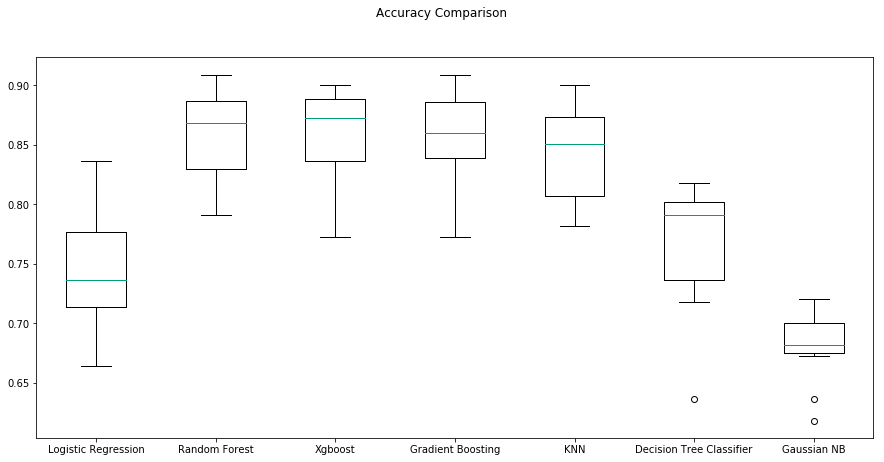

In [64]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

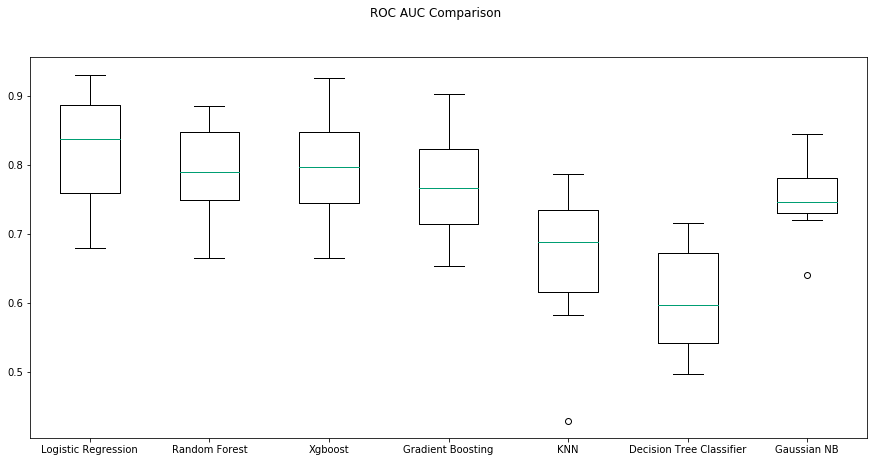

In [65]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

Area under ROC Curve (or AUC for short) is a performance metric for binary classification problems. 
The AUC represents a model’s ability to discriminate between positive and negative classes. 

# Gradient Boosting

In [66]:
# gb_cfl = GradientBoostingClassifier()



# params = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
#               'max_depth': [4, 6, 8],
#               'min_samples_leaf': [1, 3,5,7,9],
#           'random_state' : [100, 200, 500, 750]
#               }

# folds = 5
# param_comb = 800

# random_search = RandomizedSearchCV(gb_cfl, 
#                                    param_distributions=params, 
#                                    n_iter=param_comb, 
#                                    scoring='accuracy', 
#                                    n_jobs=-1, cv=5, 
#                                    verbose=3, 
#                                    random_state=42)

# random_search.fit(X, y)
# print('\n Best estimator:')
# print(random_search.best_estimator_)
# print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
# print(random_search.best_score_ )
# print('\n Best hyperparameters:')
# print(random_search.best_params_)
# results = pd.DataFrame(random_search.cv_results_)
# results.to_csv('gbc-random-grid-search-results-01.csv', index=False)

In [67]:
gbc = GradientBoostingClassifier(
            criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=9, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=100,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
gbc.fit(X_train , y_train)
gbcPredict = gbc.predict(X_test)
gbcpredictProb = gbc.predict_proba(X_test)
print(confusion_matrix(y_test, gbcPredict))
print(classification_report(y_test, gbcPredict))
print('ROC AUC :', roc_auc_score(y_test, gbcpredictProb[:,1]))
print("accuracy score : ",accuracy_score(gbcPredict, y_test))

[[304   5]
 [ 44  15]]
              precision    recall  f1-score   support

         0.0       0.87      0.98      0.93       309
         1.0       0.75      0.25      0.38        59

   micro avg       0.87      0.87      0.87       368
   macro avg       0.81      0.62      0.65       368
weighted avg       0.85      0.87      0.84       368

ROC AUC : 0.8378585925072679
accuracy score :  0.8668478260869565


# Logistic Regression

In [68]:
# logmodel = LogisticRegression()



# params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#          'class_weight' : ({0:1, 1:2}, {0:1, 1:6}, {0:1, 1:4}),
#           'random_state' : [100, 200, 500, 750]
#          }

# folds = 5
# param_comb = 800

# random_search = RandomizedSearchCV(logmodel, 
#                                    param_distributions=params, 
#                                    n_iter=param_comb, 
#                                    scoring='accuracy', 
#                                    n_jobs=-1, cv=5, 
#                                    verbose=3, 
#                                    random_state=42)

# random_search.fit(X, y)
# print('\n Best estimator:')
# print(random_search.best_estimator_)
# print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
# print(random_search.best_score_ )
# print('\n Best hyperparameters:')
# print(random_search.best_params_)
# results = pd.DataFrame(random_search.cv_results_)
# results.to_csv('logmodel-random-grid-search-results-01.csv', index=False)

In [69]:
logmodel = LogisticRegression(C=0.01, class_weight={0: 1, 1: 2}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=100,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
logmodel.fit(X_train,y_train)
lmpredictions = logmodel.predict(X_test)
lm_predictProb = logmodel.predict_proba(X_test)
print(confusion_matrix(y_test,lmpredictions))
print(classification_report(y_test,lmpredictions))
print('roc_auc_score :',roc_auc_score(y_test, lm_predictProb[:,1]))
print("accuracy score : ",accuracy_score(lmpredictions, y_test))

[[288  21]
 [ 26  33]]
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92       309
         1.0       0.61      0.56      0.58        59

   micro avg       0.87      0.87      0.87       368
   macro avg       0.76      0.75      0.75       368
weighted avg       0.87      0.87      0.87       368

roc_auc_score : 0.8548077450496407
accuracy score :  0.8722826086956522


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [70]:
pickle.dump(logmodel, open('log.sav', 'wb'))

# XGBOOST

In [71]:
# xgb_cfl = XGBClassifier(n_jobs = -1)



# params = {
#         'n_estimators' : [100, 200, 500, 750],
#         'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],
#         'min_child_weight': [1, 5, 7, 10],
#         'gamma': [0.1, 0.5, 1, 1.5, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5, 10, 12]
#         }

# folds = 5
# param_comb = 800

# random_search = RandomizedSearchCV(xgb_cfl, 
#                                    param_distributions=params, 
#                                    n_iter=param_comb, 
#                                    scoring='accuracy', 
#                                    n_jobs=-1, cv=5, 
#                                    verbose=3, 
#                                    random_state=42)

# random_search.fit(X, y)
# print('\n Best estimator:')
# print(random_search.best_estimator_)
# print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
# print(random_search.best_score_ )
# print('\n Best hyperparameters:')
# print(random_search.best_params_)
# results = pd.DataFrame(random_search.cv_results_)
# results.to_csv('xgb-random-grid-search-results-01.csv', index=False)

In [72]:
xg = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=0.8, gamma=0.5, learning_rate=0.05,
               max_delta_step=0, max_depth=12, min_child_weight=10, missing=None,
               n_estimators=200, n_jobs=-1, nthread=None,
               objective='binary:logistic', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
               subsample=0.6)
xg.fit(X_train , y_train)
xgPredict = xg.predict(X_test)
xgpredictProb = xg.predict_proba(X_test)
print(confusion_matrix(y_test, xgPredict))
print(classification_report(y_test, xgPredict))
print('ROC AUC :', roc_auc_score(y_test, xgpredictProb[:,1]))
print("accuracy score : ",accuracy_score(xgPredict, y_test))

[[303   6]
 [ 38  21]]
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       309
         1.0       0.78      0.36      0.49        59

   micro avg       0.88      0.88      0.88       368
   macro avg       0.83      0.67      0.71       368
weighted avg       0.87      0.88      0.86       368

ROC AUC : 0.8499259503044266
accuracy score :  0.8804347826086957


In [73]:
pickle.dump(xg, open('xgb.sav', 'wb'))

# Random Forest

In [74]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier(random_state=100)
scoring = 'roc_auc'
# results = model_selection.cross_val_score(
#     modelCV, X_train, y_train, cv=kfold, scoring=scoring)
# print("AUC score (STD): %.2f (%.2f)" % (results.mean(), results.std()))

In [75]:
# rfc_clf = RandomForestClassifier(n_jobs = -1)



# params = {
#         'n_estimators': [50, 75, 100, 125, 150, 175],
#               'min_samples_split':[2,4,6,8,10],
#               'min_samples_leaf': [1, 2, 3, 4],
#               'max_depth': [5, 10, 15, 20, 25],
#         'random_state': [100, 200, 500, 750]
#         }

# folds = 5
# param_comb = 800

# random_search = RandomizedSearchCV(rfc_clf, 
#                                    param_distributions=params, 
#                                    n_iter=param_comb, 
#                                    scoring='accuracy', 
#                                    n_jobs=-1, cv=5, 
#                                    verbose=3, 
#                                    random_state=42)

# random_search.fit(X, y)
# print('\n Best estimator:')
# print(random_search.best_estimator_)
# print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
# print(random_search.best_score_ )
# print('\n Best hyperparameters:')
# print(random_search.best_params_)
# results = pd.DataFrame(random_search.cv_results_)
# results.to_csv('rfc-random-grid-search-results-01.csv', index=False)

In [76]:
rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=6,
            min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=-1,
            oob_score=False, random_state=200, verbose=0, warm_start=False)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
rfc_predictProb = rfc.predict_proba(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))
print('ROC AUC :', roc_auc_score(y_test, rfc_predictProb[:,1]))
print("accuracy score : ",accuracy_score(rfc_pred, y_test))

[[308   1]
 [ 51   8]]
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92       309
         1.0       0.89      0.14      0.24        59

   micro avg       0.86      0.86      0.86       368
   macro avg       0.87      0.57      0.58       368
weighted avg       0.86      0.86      0.81       368

ROC AUC : 0.8037683067302945
accuracy score :  0.8586956521739131


# Ensamble Lerner: Voting Classifier

In [77]:
from sklearn.ensemble import VotingClassifier #importing the relevant module

params_grid_vclf = {}

estimators = [
    ("Gradient Boost", gbc),
    ("xgb", xg), 
    ("Log", logmodel),
]

voting_clf = VotingClassifier(estimators,voting='soft')

GridCV_voting_clf = GridSearchCV(voting_clf, params_grid_vclf, verbose=1, cv=5)
voting_clf.fit(X_train, y_train)
# score_grid_vclf = GridCV_voting_clf.best_score_

# model_vclf = GridCV_voting_clf.best_estimator_


predict_vote = voting_clf.predict(X_test)
proba_vote = voting_clf.predict_proba(X_test)
print(confusion_matrix(y_test,predict_vote))
print(classification_report(y_test, predict_vote))
print("accuracy score : ",accuracy_score(predict_vote, y_test))
print('ROC AUC :', roc_auc_score(y_test, proba_vote[:,1]))

[[305   4]
 [ 38  21]]
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       309
         1.0       0.84      0.36      0.50        59

   micro avg       0.89      0.89      0.89       368
   macro avg       0.86      0.67      0.72       368
weighted avg       0.88      0.89      0.87       368

accuracy score :  0.8858695652173914
ROC AUC : 0.8685755032636717


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [78]:
X_train.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
1011,2.142857,3.836793,0.357143,3.75,0.000000,0.0,4.928571,3.333333,1.25,1.666667,2.177199,3.748043,1.666667,5.0,1.785714,0.0,5.000000,0.000000,1.875,2.500000,3.333333,0.625,1.111111,0.000000,0.294118,0.0,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1152,0.357143,1.589120,0.714286,0.00,3.333333,5.0,4.785714,3.333333,0.00,5.000000,0.555029,4.801245,0.555556,0.0,2.500000,0.0,3.333333,0.000000,0.375,1.666667,3.333333,0.250,0.555556,0.666667,0.588235,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0
650,2.976190,1.145311,0.000000,2.50,5.000000,0.0,0.214286,3.333333,1.25,5.000000,1.198789,3.952620,2.222222,0.0,0.714286,0.0,1.666667,1.666667,1.500,1.666667,1.666667,0.625,0.555556,0.666667,0.588235,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
824,2.857143,0.307802,5.000000,2.50,1.666667,5.0,1.857143,0.000000,1.25,5.000000,0.859136,1.498494,2.222222,0.0,2.857143,0.0,0.000000,0.000000,2.000,2.500000,3.333333,0.125,0.000000,0.000000,0.000000,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
1108,2.023810,3.185397,0.000000,2.50,5.000000,5.0,2.714286,1.666667,0.00,0.000000,0.379410,3.942381,0.555556,0.0,2.857143,0.0,1.666667,0.000000,0.375,2.500000,3.333333,0.375,0.000000,0.333333,0.588235,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0


In [79]:
X_train.shape

(1102, 44)

In [80]:
import pickle

In [81]:
pickle.dump(voting_clf, open('votclf.sav', 'wb'))

In [82]:
xg._Booster.save_model('./model.bst')

In [83]:
X_test.iloc[0]

Age                                  2.380952
DailyRate                            4.405870
DistanceFromHome                     0.000000
Education                            2.500000
EnvironmentSatisfaction              5.000000
Gender                               0.000000
HourlyRate                           3.571429
JobInvolvement                       3.333333
JobLevel                             2.500000
JobSatisfaction                      0.000000
MonthlyIncome                        3.310427
MonthlyRate                          2.850432
NumCompaniesWorked                   0.555556
OverTime                             0.000000
PercentSalaryHike                    0.714286
PerformanceRating                    0.000000
RelationshipSatisfaction             1.666667
StockOptionLevel                     1.666667
TotalWorkingYears                    1.875000
TrainingTimesLastYear                2.500000
WorkLifeBalance                      3.333333
YearsAtCompany                    

# AUC ROC Curve

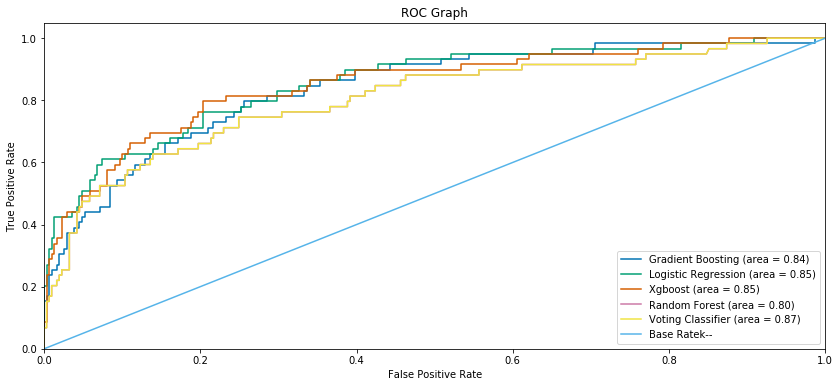

In [84]:
# Create ROC Graph
gb_fpr, gb_tpr, thresholds = roc_curve(y_test, gbcpredictProb[:,1])
log_fpr, log_tpr, log_thresholds = roc_curve(y_test, lm_predictProb[:,1])
xg_fpr, xg_tpr, xg_thresholds = roc_curve(y_test, xgpredictProb[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rfc_predictProb[:,1])
vote_fpr, vote_tpr, rf_thresholds = roc_curve(y_test, proba_vote[:,1])
plt.figure(figsize=(14, 6))

gb_roc_auc = auc(gb_fpr, gb_tpr)
log_roc_auc = auc(log_fpr, log_tpr)
xg_roc_auc = auc(xg_fpr, xg_tpr)
rf_roc_auc = auc(rf_fpr, rf_tpr)
vote_roc_auc = auc(vote_fpr, vote_tpr)
                                          
                                          
# Plot Logistic Regression ROC
plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting (area = %0.2f)' % gb_roc_auc)
plt.plot(log_fpr, log_tpr, label='Logistic Regression (area = %0.2f)' % log_roc_auc)
plt.plot(xg_fpr, xg_tpr, label='Xgboost (area = %0.2f)' % xg_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Voting Classifier (area = %0.2f)' % vote_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

# Model Evaluation

In [85]:
data= X
target = y

In [86]:
def calc_train_error(X_train, y_train, model):
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    matt = matthews_corrcoef(y_train, predictions)
    f1 = f1_score(y_train, predictions, average='macro')
    report = classification_report(y_train, predictions)
    roc_auc = roc_auc_score(y_train, predictProba[:,1])
    accuracy = accuracy_score(y_train, predictions)
    confMatrix = confusion_matrix(y_train, predictions)
    logloss = log_loss(y_train, predictProba)
    return {
        'report' : report,
        'matthews' : matt,
        'f1' : f1,
        'roc' : roc_auc,
        'accuracy' : accuracy,
        'confusion' : confMatrix,
        'logloss' : logloss
    }

def calc_validation_error(X_test, y_test, model):
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    matt = matthews_corrcoef(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='macro')
    report = classification_report(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictProba[:,1])
    accuracy = accuracy_score(y_test, predictions)
    confMatrix = confusion_matrix(y_test, predictions)
    logloss = log_loss(y_test, predictProba)
    return {
        'report' : report,
        'matthews' : matt,
        'f1' : f1,
        'roc' : roc_auc,
        'accuracy' : accuracy,
        'confusion' : confMatrix,
        'logloss' : logloss
    }

def calc_metrics(X_train, y_train, X_test, y_test, model):
    # fits model and returns the classification metrics for in sample error and out of sample error
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [87]:
K = 5
kf = KFold(n_splits=K, shuffle=True, random_state=42)

In [88]:
hasilfold = list(kf.split(data, target))
hasilfold

[(array([   0,    1,    2, ..., 1466, 1467, 1469]),
  array([  15,   23,   29,   30,   32,   43,   44,   49,   51,   56,   58,
           59,   63,   65,   67,   70,   76,   78,   81,   99,  101,  107,
          111,  115,  123,  128,  141,  163,  168,  175,  184,  192,  196,
          198,  203,  208,  218,  220,  231,  233,  236,  237,  239,  240,
          244,  247,  259,  261,  270,  271,  274,  275,  277,  289,  297,
          303,  306,  309,  310,  316,  322,  324,  332,  339,  342,  344,
          350,  351,  353,  354,  358,  361,  363,  365,  367,  371,  374,
          381,  394,  398,  405,  411,  415,  416,  422,  423,  425,  426,
          427,  428,  429,  430,  432,  433,  439,  451,  462,  464,  478,
          479,  482,  486,  493,  494,  497,  506,  522,  526,  528,  534,
          535,  538,  543,  549,  551,  560,  567,  570,  573,  578,  582,
          583,  584,  588,  591,  601,  602,  607,  615,  617,  619,  626,
          628,  651,  661,  665,  670,  677,  67

### Gradient Boosting Evaluation

In [89]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    #instantiate model
    gbc_clf = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                      learning_rate=0.05, loss='deviance', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=9, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_iter_no_change=None, presort='auto', random_state=100,
                      subsample=1.0, tol=0.0001, validation_fraction=0.1,
                      verbose=0, warm_start=False)
    
    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, gbc_clf)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [90]:
listItem = []
listIndex = []

for i, tr, val in zip(range(1, len(train_errors)+1), train_errors, validation_errors):
    listItem.append([tr['accuracy'], val['accuracy'], tr['roc'], val['roc'], tr['f1'], val['f1'], tr['matthews'], val['matthews'], tr['logloss'], val['logloss']])
    listIndex.append('Iteration {}'. format(i))

listItem.append(list(np.mean(listItem, axis = 0)))
listIndex.append('Average')

dfEvaluate_gbc = pd.DataFrame(listItem,
                         columns = ['Train Accuracy', 'Test Accuracy', 
                                            'Train ROC AUC', 'Test ROC AUC', 
                                            'Train f1 Score', 'Test f1 Score',
                                           'Train Matthew Corr Coef', 'Test Matthew Corr Coef', 'Train Log Loss', 'Test Log Loss'], index = listIndex)
dfEvaluate_gbc

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train f1 Score,Test f1 Score,Train Matthew Corr Coef,Test Matthew Corr Coef,Train Log Loss,Test Log Loss
Iteration 1,0.955782,0.874150,0.989011,0.770840,0.911894,0.588126,0.836427,0.258538,0.162466,0.328319
Iteration 2,0.952381,0.891156,0.985007,0.877173,0.902293,0.684211,0.821174,0.456435,0.177134,0.285087
Iteration 3,0.954932,0.884354,0.990686,0.811749,0.904896,0.737196,0.823221,0.535559,0.162729,0.332644
Iteration 4,0.955782,0.863946,0.989436,0.750538,0.908354,0.649332,0.830291,0.369098,0.157975,0.375943
Iteration 5,0.950680,0.833333,0.983341,0.809468,0.890445,0.641740,0.798546,0.360331,0.162243,0.390440
Average,0.953912,0.869388,0.987496,0.803954,0.903576,0.660121,0.821932,0.395992,0.164510,0.342486


In [91]:
from sklearn.model_selection import cross_val_score

scores_gbc = GradientBoostingClassifier(criterion='friedman_mse', init=None,
                      learning_rate=0.05, loss='deviance', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=9, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_iter_no_change=None, presort='auto', random_state=100,
                      subsample=1.0, tol=0.0001, validation_fraction=0.1,
                      verbose=0, warm_start=False)

gbc_cv = cross_val_score(scores_gbc, X_test, y_test, cv=3)
gbc_cv.mean()

0.8505708827580079

### Logistic regression evaluation

In [92]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    #instantiate model
    log_clf = LogisticRegression(C=0.01, class_weight={0: 1, 1: 2}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=100,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
    
    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, log_clf)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [93]:
listItem = []
listIndex = []

for i, tr, val in zip(range(1, len(train_errors)+1), train_errors, validation_errors):
    listItem.append([tr['accuracy'], val['accuracy'], tr['roc'], val['roc'], tr['f1'], val['f1'], tr['matthews'], val['matthews'], tr['logloss'], val['logloss']])
    listIndex.append('Iteration {}'. format(i))

listItem.append(list(np.mean(listItem, axis = 0)))
listIndex.append('Average')

dfEvaluate_log = pd.DataFrame(listItem,
                         columns = ['Train Accuracy', 'Test Accuracy', 
                                            'Train ROC AUC', 'Test ROC AUC', 
                                            'Train f1 Score', 'Test f1 Score',
                                           'Train Matthew Corr Coef', 'Test Matthew Corr Coef', 'Train Log Loss', 'Test Log Loss'], index = listIndex)
dfEvaluate_log

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train f1 Score,Test f1 Score,Train Matthew Corr Coef,Test Matthew Corr Coef,Train Log Loss,Test Log Loss
Iteration 1,0.872449,0.863946,0.873236,0.789341,0.765594,0.704374,0.531819,0.408748,0.328198,0.360092
Iteration 2,0.879252,0.891156,0.854257,0.871410,0.772286,0.733937,0.545943,0.489069,0.337478,0.320152
Iteration 3,0.875850,0.887755,0.860242,0.855806,0.746528,0.789247,0.497914,0.583087,0.329924,0.333569
Iteration 4,0.886905,0.850340,0.866030,0.810750,0.774112,0.706000,0.552930,0.413811,0.324021,0.366255
Iteration 5,0.890306,0.843537,0.867973,0.820427,0.766079,0.735301,0.538643,0.474779,0.316199,0.383700
Average,0.880952,0.867347,0.864347,0.829547,0.764920,0.733772,0.533450,0.473899,0.327164,0.352754


In [94]:
from sklearn.model_selection import cross_val_score

scores_log = LogisticRegression(C=0.01, class_weight={0: 1, 1: 2}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=100,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

xgb_cv = cross_val_score(scores_log, X_test, y_test, cv=3)
xgb_cv.mean()

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



0.8641432315962504

### XGBoost Evaluation

In [95]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    #instantiate model
    xgb_clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                       colsample_bytree=0.8, gamma=0.5, learning_rate=0.05,
                       max_delta_step=0, max_depth=12, min_child_weight=10, missing=None,
                       n_estimators=200, n_jobs=-1, nthread=None,
                       objective='binary:logistic', random_state=0, reg_alpha=0,
                       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
                       subsample=0.6)
    
    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, xgb_clf)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [96]:
listItem = []
listIndex = []

for i, tr, val in zip(range(1, len(train_errors)+1), train_errors, validation_errors):
    listItem.append([tr['accuracy'], val['accuracy'], tr['roc'], val['roc'], tr['f1'], val['f1'], tr['matthews'], val['matthews'], tr['logloss'], val['logloss']])
    listIndex.append('Iteration {}'. format(i))

listItem.append(list(np.mean(listItem, axis = 0)))
listIndex.append('Average')

dfEvaluate_xgb = pd.DataFrame(listItem,
                         columns = ['Train Accuracy', 'Test Accuracy', 
                                            'Train ROC AUC', 'Test ROC AUC', 
                                            'Train f1 Score', 'Test f1 Score',
                                           'Train Matthew Corr Coef', 'Test Matthew Corr Coef', 'Train Log Loss', 'Test Log Loss'], index = listIndex)
dfEvaluate_xgb

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train f1 Score,Test f1 Score,Train Matthew Corr Coef,Test Matthew Corr Coef,Train Log Loss,Test Log Loss
Iteration 1,0.922619,0.884354,0.933083,0.793062,0.833219,0.653350,0.700763,0.365040,0.233965,0.325175
Iteration 2,0.914116,0.887755,0.934928,0.868292,0.807604,0.679453,0.658054,0.435437,0.239068,0.282004
Iteration 3,0.916667,0.884354,0.942479,0.822158,0.806121,0.737196,0.653023,0.535559,0.228890,0.335724
Iteration 4,0.923469,0.860544,0.940525,0.799380,0.827085,0.645418,0.692415,0.353159,0.226663,0.344885
Iteration 5,0.914116,0.860544,0.928517,0.842855,0.788024,0.706480,0.625977,0.492165,0.231364,0.353524
Average,0.918197,0.875510,0.935906,0.825149,0.812410,0.684379,0.666046,0.436272,0.231990,0.328263


In [97]:
from sklearn.model_selection import cross_val_score

scores_xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                       colsample_bytree=0.8, gamma=0.5, learning_rate=0.05,
                       max_delta_step=0, max_depth=12, min_child_weight=10, missing=None,
                       n_estimators=200, n_jobs=-1, nthread=None,
                       objective='binary:logistic', random_state=0, reg_alpha=0,
                       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
                       subsample=0.6)

xgb_cv = cross_val_score(scores_xgb, X_test, y_test, cv=3)
xgb_cv.mean()

0.839686347683149

### Random Forest Evaluation

In [98]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    #instantiate model
    rfc_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=20, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=6,
                        min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=-1,
                        oob_score=False, random_state=200, verbose=0, warm_start=False)
    
    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, rfc_clf)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [99]:
listItem = []
listIndex = []

for i, tr, val in zip(range(1, len(train_errors)+1), train_errors, validation_errors):
    listItem.append([tr['accuracy'], val['accuracy'], tr['roc'], val['roc'], tr['f1'], val['f1'], tr['matthews'], val['matthews'], tr['logloss'], val['logloss']])
    listIndex.append('Iteration {}'. format(i))

listItem.append(list(np.mean(listItem, axis = 0)))
listIndex.append('Average')

dfEvaluate_rfc = pd.DataFrame(listItem,
                         columns = ['Train Accuracy', 'Test Accuracy', 
                                            'Train ROC AUC', 'Test ROC AUC', 
                                            'Train f1 Score', 'Test f1 Score',
                                           'Train Matthew Corr Coef', 'Test Matthew Corr Coef', 'Train Log Loss', 'Test Log Loss'], index = listIndex)
dfEvaluate_rfc

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train f1 Score,Test f1 Score,Train Matthew Corr Coef,Test Matthew Corr Coef,Train Log Loss,Test Log Loss
Iteration 1,0.973639,0.874150,0.999897,0.739165,0.949734,0.554819,0.904169,0.227236,0.153563,0.350895
Iteration 2,0.979592,0.874150,0.999995,0.872638,0.961171,0.572187,0.925193,0.322190,0.157605,0.314922
Iteration 3,0.976190,0.860544,0.999919,0.812071,0.952330,0.635556,0.908899,0.404883,0.153368,0.361524
Iteration 4,0.970238,0.857143,0.999899,0.764493,0.940556,0.585526,0.887595,0.299624,0.151454,0.373309
Iteration 5,0.970238,0.826531,0.999636,0.810053,0.937520,0.591522,0.881365,0.309140,0.150173,0.398629
Average,0.973980,0.858503,0.999869,0.799684,0.948262,0.587922,0.901444,0.312614,0.153233,0.359856


In [100]:
from sklearn.model_selection import cross_val_score

scores_rfc = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=20, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=6,
                        min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=-1,
                        oob_score=False, random_state=200, verbose=0, warm_start=False)

rfc_cv = cross_val_score(scores_rfc, X_test, y_test, cv=3)
rfc_cv.mean()

0.8451286152205785

### Voting Classifier

In [101]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    X_train, X_val = data.iloc[train_index], data.iloc[val_index]
    y_train, y_val = target.iloc[train_index], target.iloc[val_index]
    
    #instantiate model
    voting_clf = VotingClassifier(estimators = [("Gradient Boost", gbc),("Logistic Regression", logmodel), ("XGBoost", xg)],voting='soft')
    
    # calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, voting_clf)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [102]:
listItem = []
listIndex = []

for i, tr, val in zip(range(1, len(train_errors)+1), train_errors, validation_errors):
    listItem.append([tr['accuracy'], val['accuracy'], tr['roc'], val['roc'], tr['f1'], val['f1'], tr['matthews'], val['matthews'], tr['logloss'], val['logloss']])
    listIndex.append('Iteration {}'. format(i))

listItem.append(list(np.mean(listItem, axis = 0)))
listIndex.append('Average')

dfEvaluate_vot = pd.DataFrame(listItem,
                         columns = ['Train Accuracy', 'Test Accuracy', 
                                            'Train ROC AUC', 'Test ROC AUC', 
                                            'Train f1 Score', 'Test f1 Score',
                                           'Train Matthew Corr Coef', 'Test Matthew Corr Coef', 'Train Log Loss', 'Test Log Loss'], index = listIndex)
dfEvaluate_vot

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train f1 Score,Test f1 Score,Train Matthew Corr Coef,Test Matthew Corr Coef,Train Log Loss,Test Log Loss
Iteration 1,0.937925,0.884354,0.956446,0.799095,0.871668,0.641361,0.764933,0.354882,0.228713,0.320420
Iteration 2,0.929422,0.887755,0.946758,0.888794,0.847059,0.689148,0.726229,0.440242,0.240580,0.283019
Iteration 3,0.935374,0.891156,0.958407,0.848544,0.856445,0.763499,0.739451,0.569718,0.229202,0.316212
Iteration 4,0.934524,0.877551,0.956971,0.808511,0.856560,0.700679,0.741377,0.455621,0.224771,0.339460
Iteration 5,0.936224,0.857143,0.951368,0.842563,0.852065,0.696161,0.733733,0.476224,0.225537,0.355769
Average,0.934694,0.879592,0.953990,0.837501,0.856759,0.698170,0.741145,0.459338,0.229761,0.322976


In [103]:
from sklearn.model_selection import cross_val_score

scores_vot = VotingClassifier(estimators = [("Gradient Boost", gbc),("Logistic Regression", logmodel), ("XGBoost", xg)],voting='soft')

vot_cv = cross_val_score(scores_vot, X_test, y_test, cv=3)
vot_cv.mean()

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



0.842440801457195

# Comparison

In [104]:
outside = ['Accuracy', 'Accuracy', 'Accuracy', 'Accuracy', 'Accuracy','Accuracy', 'Accuracy','Accuracy',
          'ROC_AUC', 'ROC_AUC', 'ROC_AUC', 'ROC_AUC', 'ROC_AUC','ROC_AUC', 'ROC_AUC','ROC_AUC',
          'F1','F1','F1','F1','F1', 'F1','F1','F1',
          'Matt. Coef','Matt. Coef','Matt. Coef','Matt. Coef','Matt. Coef','Matt. Coef','Matt. Coef','Matt. Coef']
inside = [1,2,3,4,5,6,'Avg','Std', 1,2,3,4,5,6,'Avg','Std', 1,2,3,4,5,6,'Avg','Std', 1,2,3,4,5,6,'Avg','Std']
hier_index = list(zip(outside, inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)
hier_index

MultiIndex(levels=[['Accuracy', 'F1', 'Matt. Coef', 'ROC_AUC'], [1, 2, 3, 4, 5, 6, 'Avg', 'Std']],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2], [0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7]])

In [105]:
acc = []
auc = []
F1 = []
matt = []

kol = {
    'acc' : 'Test Accuracy',
    'auc' : 'Test ROC AUC',
    'F1' : 'Test f1 Score',
    'matt' : 'Test Matthew Corr Coef'
}

for Erfc, Egbc, Exgb, vot, log in zip(dfEvaluate_rfc.values, dfEvaluate_gbc.values, dfEvaluate_xgb.values, dfEvaluate_vot.values, dfEvaluate_log.values):
    acc.append([Erfc[1], Egbc[1], Exgb[1], vot[1], log[1]])
    auc.append([Erfc[3], Egbc[3], Exgb[3],vot[3], log[3]])
    F1.append([Erfc[5], Egbc[5], Exgb[5],vot[5], log[5]])
    matt.append([Erfc[7],Egbc[7], Exgb[7],vot[7], log[7]])

for i,j in zip([acc,auc,F1,matt], ['acc','auc','F1','matt']):
    i.append([dfEvaluate_gbc[kol[j]].mean(), dfEvaluate_xgb[kol[j]].mean(), dfEvaluate_rfc[kol[j]].mean(), dfEvaluate_vot[kol[j]].mean(), dfEvaluate_log[kol[j]].mean()])
    i.append([dfEvaluate_gbc[kol[j]].std(), dfEvaluate_xgb[kol[j]].std(), dfEvaluate_rfc[kol[j]].std(),dfEvaluate_vot[kol[j]].std(),dfEvaluate_log[kol[j]].std()])


dfEval = pd.concat([pd.DataFrame(acc),pd.DataFrame(auc),pd.DataFrame(F1),pd.DataFrame(matt)], axis=0)
dfEval.columns = ['RFC', 'GBC', 'XGB', 'VOT', 'LOG']
dfEval.index = hier_index
dfEval

RFC       GBC       XGB       VOT       LOG
Accuracy   1    0.874150  0.874150  0.884354  0.884354  0.863946
           2    0.874150  0.891156  0.887755  0.887755  0.891156
           3    0.860544  0.884354  0.884354  0.891156  0.887755
           4    0.857143  0.863946  0.860544  0.877551  0.850340
           5    0.826531  0.833333  0.860544  0.857143  0.843537
           6    0.858503  0.869388  0.875510  0.879592  0.867347
           Avg  0.869388  0.875510  0.858503  0.879592  0.867347
           Std  0.020249  0.012283  0.017423  0.012093  0.019241
ROC_AUC    1    0.739165  0.770840  0.793062  0.799095  0.789341
           2    0.872638  0.877173  0.868292  0.888794  0.871410
           3    0.812071  0.811749  0.822158  0.848544  0.855806
           4    0.764493  0.750538  0.799380  0.808511  0.810750
           5    0.810053  0.809468  0.842855  0.842563  0.820427
           6    0.799684  0.803954  0.825149  0.837501  0.829547
           Avg  0.803954  0.825149  0.799684  0.837501  0.829547
           Std  0.043364  0.027847  0.045791  0.031919  0.029983
F1         1    0.554819  0.588126  0.653350  0.641361  0.704374
           2    0.572187  0.684211  0.679453  0.689148  0.733937
           3    0.635556  0.737196  0.737196  0.763499  0.789247
           4    0.585526  0.649332  0.645418  0.700679  0.706000
           5    0.591522  0.641740  0.706480  0.696161  0.735301
           6    0.587922  0.660121  0.684379  0.698170  0.733772
           Avg  0.660121  0.684379  0.587922  0.698170  0.733772
           Std  0.049312  0.034009  0.026948  0.038954  0.030710
Matt. Coef 1    0.227236  0.258538  0.365040  0.354882  0.408748
           2    0.322190  0.456435  0.435437  0.440242  0.489069
           3    0.404883  0.535559  0.535559  0.569718  0.583087
           4    0.299624  0.369098  0.353159  0.455621  0.413811
           5    0.309140  0.360331  0.492165  0.476224  0.474779
           6    0.312614  0.395992  0.436272  0.459338  0.473899
           Avg  0.395992  0.436272  0.312614  0.459338  0.473899
           Std  0.093831  0.070660  0.056702  0.068933  0.063258

In [106]:
for val_err in validation_errors:
    print(val_err['report'])

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.94       255
         1.0       0.69      0.23      0.35        39

   micro avg       0.88      0.88      0.88       294
   macro avg       0.79      0.61      0.64       294
weighted avg       0.87      0.88      0.86       294

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       252
         1.0       0.76      0.31      0.44        42

   micro avg       0.89      0.89      0.89       294
   macro avg       0.83      0.65      0.69       294
weighted avg       0.88      0.89      0.87       294

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       243
         1.0       0.85      0.45      0.59        51

   micro avg       0.89      0.89      0.89       294
   macro avg       0.87      0.72      0.76       294
weighted avg       0.89      0.89      0.88       294

              preci

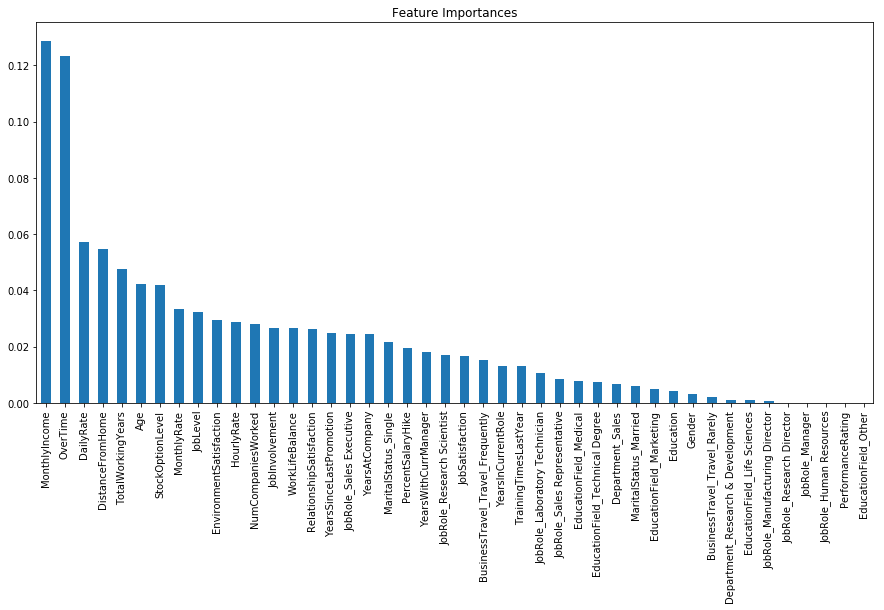

In [107]:
fig = plt.figure(figsize=(15, 7))
Fim= pd.Series(gbc.feature_importances_, X_train.columns).sort_values(ascending = False)
Fim.plot(kind='bar', colormap='tab10', title='Feature Importances')

In [108]:
# filename = 'voting.sav'
# pickle.dump(voting_clf, open(filename, 'wb'))